## Problem to be tackled:

<p>Markov chain Monte Carlo (MCMC) algorithms have been utilising acceptance probabilities that can be explicitly written as a function of the ratio of the target density at the two contested points.One can explicitly calculate the ratio of target density at respective points and simluate samples from target distribution,while maintaining its stationarity.
But it has been found that in many cases that target distribution is very cumbersome, may be due to intractable prior distribution or intractable likelihood distribution.In such cases ,it becomes very difficult to find acceptance probablities or ratio of target distribution at respective points.So there is need for some alternative approach to deal with such situations.</p> 

### <u> Barker’s method and the two-coin algorithm</u>
</p>Just like MH algorithm, Barker also give the accpetance probablity as :</p>

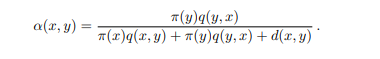
<p>Above acceptance probabilty maintain the $\pi$ stationarity, but also become difficult to obtain when we have intractable target distribution.So instead of obtaining directly acceptance probability by expicitly placing the values, he comes with other approach - <b>"Two-coin Algorithm"</b>.This Algorithm is based on the concept of <b> Bernoulli Factory</b>
    
<p> <b>The Bernoulli factory problem is one in which given events that occur with probability p is used to simulate an event with probability h(p), for some function of interest, h. </b> </p>  

<p> Bernoulli factory can be constructed to obtain events of probability α(x,y) without explicitly evaluating it. </p>

<p> The following Bernoulli factory is proposed to sample events with probability α(x,y). Suppose: </p>
$$ \pi(x)q(x,y)= c_{x}p_{x} ,  \pi(y)q(y,x)= c_{x}p_{y} $$

<ul>
    <li> here $c_{x},c_{y}$ are loose upper bounds on target distribution</li>
    <li> $p_{x},p_{y}$ are valid probabilities </li>
</ul>
<p> Now,the problem is how to find the $c_{x}$ and $p_{x}$</p>

<p>One way to arrive find the values to find $c_{x}$ such that:</p>

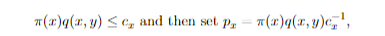    
<p> and similarly for $c_{y},p_{y}$.</p>
<p>So, Now acceptance probability can be written as :</p>

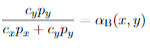
<ul>
    <li> here, $\alpha_{B}$ denotes the Barker acceptance probability </li> </ul>
    
The following two coin algorithm exactly generates the event with above probability.  

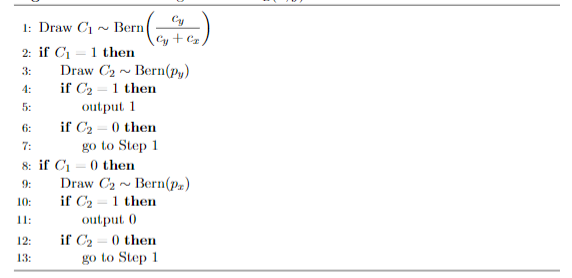

<p> The <b>proof</b> of above algorithm has been shown in Assignment 2.</p>   

#### Problems :
The computational efficiency of the two-coin algorithm relies heavily on the
upper bounds cx and cy. If the bound is loose, then the algorithm yields a large mean
execution time as mean execution time is given by:

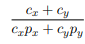



### <u>Portkey Barker’s method</u>
With the help of Bernoulli factories, one can have more flexibilty to explore other acceptance probabilities that yield π-stationarity and for which efficient Bernoulli factories can be constructed.This led to introduction of a new
family of acceptance probabilities as:
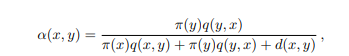

where d(x, y) = d(y, x) ≥ 0. Then α(x, y) yields a π-reversible Markov chain and the symmetry of d(x, y) is essential to this.

<p> For a particular choice of d(x, y), a Bernoulli factory can be given as :</p>

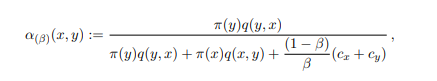
<ul> here, $\beta$ is given by user and lie in range (0,1].$c_{x}$ ansd $c_{y}$ are obtained in the similar way as in Barker's method.
    
<p> Given is the algorithm which can generate the event with same acceptance probability as mentioned above </p>
 
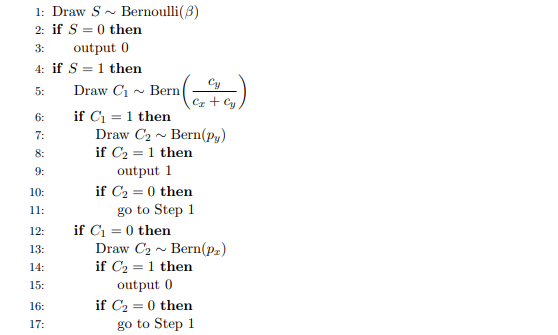
<p> The best thing of Portey- Barker algorithm is that it increases the <b> computational efficiency </b>when compare with two-coin algorithm. The first step ,in algorithm ,allows immediate rejections with probability 1 − β.For a given proposal, whenever Algorithm loops, a Bern(β) event is drawn, which if zero, rejects the proposed value immediately. Mean Execution time of this algorithm comes out to be $\frac{1}{s_{\beta}}$ where $s_{\beta}$ : </p>
 
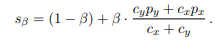

<p> But here the computational efficiency comes at a cost.When Portkey -Barker algorithm has been compared with two-coin algorithm, two-coin algorithm gives better result in the term of <b> statistical efficiency</b>. Samples value generated from
 Two- coin algorithms have small variance as compared to those from Portkey-Barker algorithm </p>
    

In [1]:
using Plots
using Distributions
using StatsBase
using Random 
using Statistics
using StatsPlots
using SpecialFunctions

In [2]:
Random.seed!(1)

TaskLocalRNG()

In [3]:
#Given 
k=10
u =Gamma(10,1/100)
h = sqrt(0.001)

0.03162277660168379

In [12]:
#Implementing Portkey- Barker algorithm

function portkey(x,y,cx,cy,beta)
    
    while true
        
    
        S= rand(Bernoulli(beta))
        if S==0
            return 0
        else
            C1= rand(Bernoulli(cy/(cy+cx)))
            if C1==1
                lambda = rand(u)
                py = pdf(Weibull(k,lambda),y)/cy
                C2 = rand(Bernoulli(py))
                if C2==1
                    return 1
                else 
                    continue

                end

            else
                lambda= rand(u)
                px= pdf(Weibull(k,lambda),x)/cx
                C2 = rand(Bernoulli(px))
                if C2==1
                    return 0
                else 
                    continue
                end
            end
        end
#         count= count-1
    end   

end            

portkey (generic function with 1 method)

In [13]:
function diff_beta(n,beta)
    samples = []
    accept =0
    push!(samples,0.1) # Just random intial point chosen
    for i in 2:n
        y = rand(Normal(samples[i-1],h))
        
        #Weibull Distribution has positve real number domain.
        if y<0
            push!(samples,samples[i-1])
            continue
        end 
        
        #Setting upper bounds
        cy = k/(exp(1)*y)
        cx = k/(exp(1)*samples[i-1])
        
#         Sampling from Portkey- Barker
        
        X =  portkey(samples[i-1],y,cx,cy,beta)
        
        if X==0
            push!(samples,samples[i-1])
        else
            push!(samples,y)
            accept = accept +1
        end
        
    end
    return samples,accept
end    
    
        
        

diff_beta (generic function with 1 method)

Acceptance ratio comes out to be 39.1


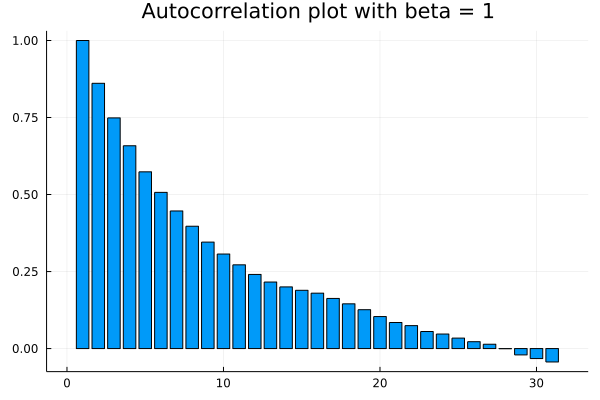

In [17]:
# Now checking for different values of Beta

Beta = [1,0.95,0.85,0.75]
n=1000
arr,accept = diff_beta(n,1)
arr = [convert(Float64,arr[x]) for x in 1:1000]
println("Acceptance ratio comes out to be ",accept*100/(n*1.0))
acf_y = StatsBase.autocor(arr)
plot(bar(acf_y, title = "Autocorrelation plot with beta = 1", legend = false))

Acceptance ratio comes out to be 35.1


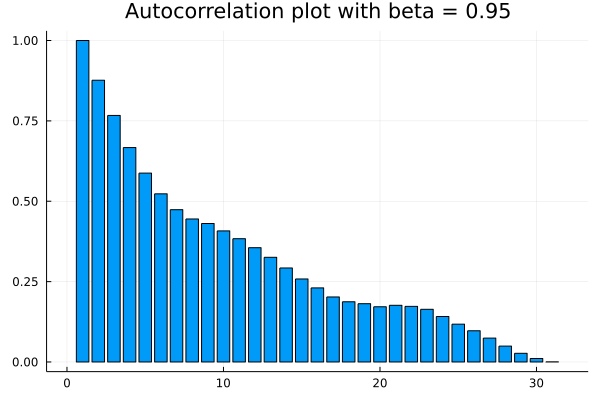

In [18]:
arr1,accept = diff_beta(n,Beta[2])
println("Acceptance ratio comes out to be ",accept*100/(n*1.0))
arr1= [convert(Float64,arr1[x]) for x in 1:1000]
acf_y = StatsBase.autocor(arr1)
plot(bar(acf_y, title = "Autocorrelation plot with beta = 0.95", legend = false))

Acceptance ratio comes out to be 22.5


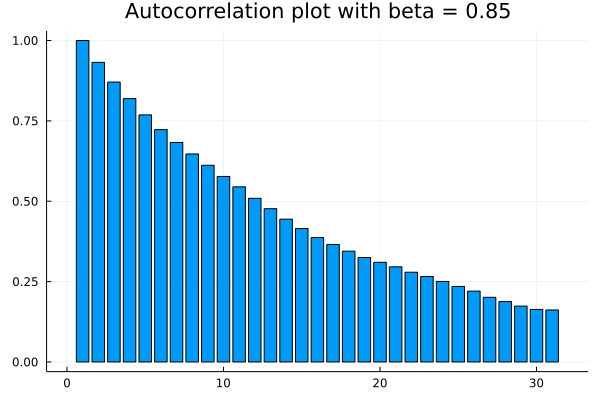

In [19]:
arr2,accept = diff_beta(n,Beta[3])
println("Acceptance ratio comes out to be ",accept*100/(n*1.0))
arr2= [convert(Float64,arr2[x]) for x in 1:1000]
acf_y = StatsBase.autocor(arr2)
plot(bar(acf_y, title = "Autocorrelation plot with beta = 0.85", legend = false))

Acceptance ratio comes out to be 15.6


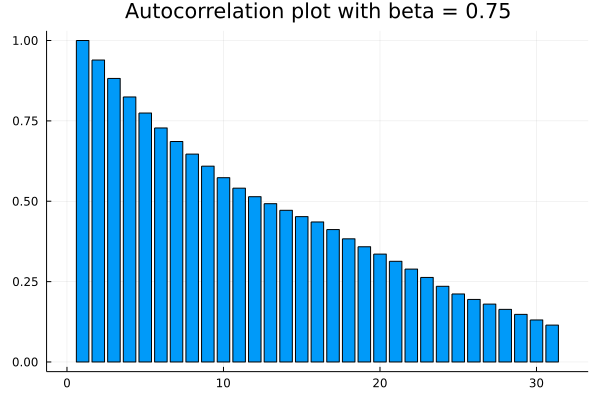

In [20]:
arr3,accept = diff_beta(n,Beta[4])
println("Acceptance ratio comes out to be ",accept*100/(n*1.0))
arr3= [convert(Float64,arr3[x]) for x in 1:1000]
acf_y = StatsBase.autocor(arr3)
plot(bar(acf_y, title = "Autocorrelation plot with beta = 0.75", legend = false))

Acceptance ratio comes out to be 41.3


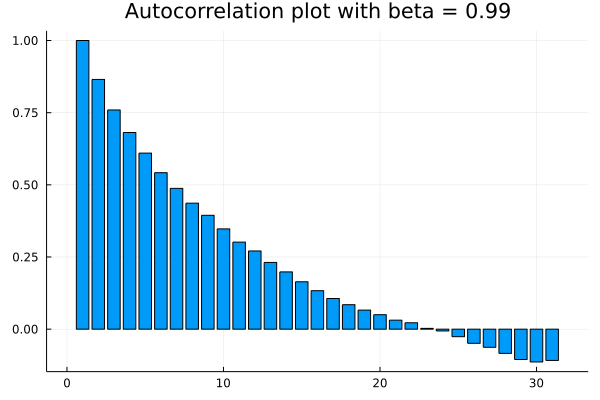

In [21]:
arr4,accept = diff_beta(n,0.99)
println("Acceptance ratio comes out to be ",accept*100/(n*1.0))
arr4= [convert(Float64,arr4[x]) for x in 1:1000]
acf_y = StatsBase.autocor(arr4)
plot(bar(acf_y, title = "Autocorrelation plot with beta = 0.99", legend = false))

## Conclusion:
#### From above plots,it can be concluded that with decrease in $\beta$ value acceptance probability decreases, morever the autocorrelation plot doesn't seems to change drastically.